In [108]:
import pandas as pd
import numpy as np

In [109]:
path = r'../data\cardio_dataset-original.csv'

df = pd.read_csv(path)
df.head()

,SEX,AGE,TC,HDL,SMOKE_,BPMED,DIAB_noyes,RISK
0,female,48,236,66,no smoking,taking,no,1.1
1,male,48,260,51,no smoking,taking,yes,7.0
2,male,44,187,49,smoking,taking,no,7.0
3,female,42,216,57,smoking,taking,no,0.4
4,female,56,156,42,no smoking,taking,no,2.2


In [110]:
df.shape

(6644, 8)

In [111]:
df['RISK'].describe()

count    6644.000000
mean       12.670334
std        12.997543
min         0.100000
25%         2.800000
50%         8.100000
75%        18.600000
max        85.400000
Name: RISK, dtype: float64

### Outlier Handaling

In [112]:
from scipy.stats import zscore

In [113]:
def remove_outliers(col_name: str, max: int = 3, min: int = -3, df=df):
    z = zscore(df[col_name])
    df["zscore"] = z
    # print(z.describe())
    # print(df.sample())
    df = df[df["zscore"] < max]
    df = df[df["zscore"] > min]

    df = df.drop("zscore", axis=1)
    print(df.shape)
    return df

In [114]:
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [115]:
num_cols = ['AGE', 'TC', 'HDL', 'RISK']

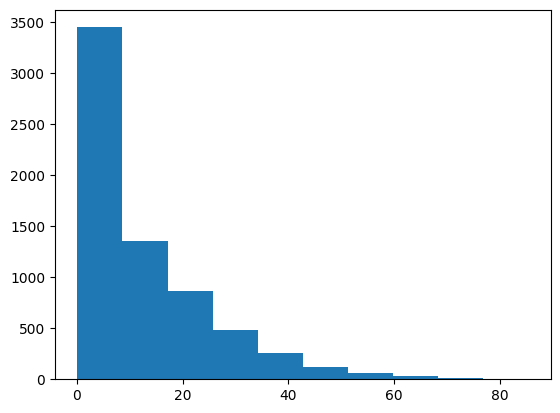

In [116]:
plt.hist(df['RISK'])
plt.show()

In [117]:
z_risk = zscore(df['RISK'])
z_risk.describe()

count    6.644000e+03
mean     1.839454e-16
std      1.000075e+00
min     -9.672043e-01
25%     -7.594571e-01
50%     -3.516571e-01
75%      4.562487e-01
max      5.596068e+00
Name: RISK, dtype: float64

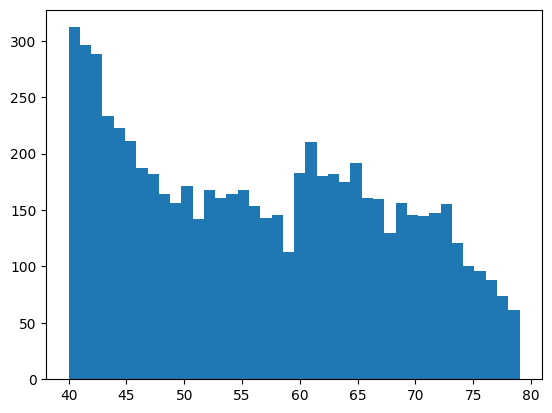

In [118]:
plt.hist(df['AGE'], bins=40)
plt.show()

In [119]:
z_age = zscore(df['AGE'])
z_age.describe()

count    6.644000e+03
mean    -2.609459e-16
std      1.000075e+00
min     -1.462823e+00
25%     -9.355433e-01
50%     -5.674368e-02
75%      8.220559e-01
max      1.964495e+00
Name: AGE, dtype: float64

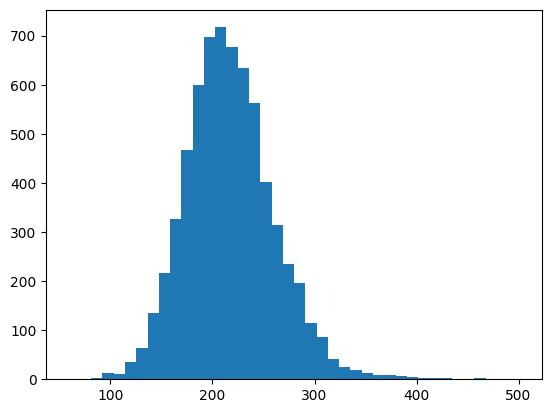

In [120]:
plt.hist(df['TC'], bins=40)
plt.show()

In [121]:
z_tc = zscore(df['TC'])
z_tc.describe()

count    6.644000e+03
mean     2.951683e-16
std      1.000075e+00
min     -3.613523e+00
25%     -6.709278e-01
50%     -7.784655e-02
75%      5.836672e-01
max      6.468858e+00
Name: TC, dtype: float64

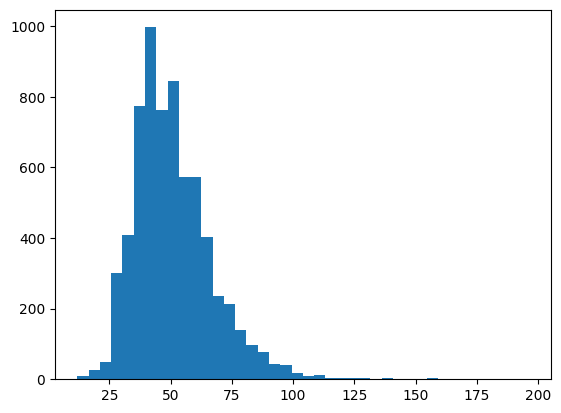

In [122]:
plt.hist(df['HDL'], bins=40)
plt.show()

In [123]:
z_hdl = zscore(df['HDL'])
z_hdl.describe()

count    6.644000e+03
mean     2.566681e-17
std      1.000075e+00
min     -2.394246e+00
25%     -6.788749e-01
50%     -1.887690e-01
75%      4.851267e-01
max      8.878190e+00
Name: HDL, dtype: float64

In [124]:
for col in num_cols:
    df = remove_outliers(col) 

(6644, 8)
(6592, 8)
(6580, 8)
(6529, 8)


In [125]:
df.shape

(6529, 8)

In [126]:
df['RISK']  = df['RISK'] / 100 # Get the 0 -1 range

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6529 entries, 0 to 6643
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEX         6529 non-null   object 
 1   AGE         6529 non-null   int64  
 2   TC          6529 non-null   int64  
 3   HDL         6529 non-null   int64  
 4   SMOKE_      6529 non-null   object 
 5   BPMED       6529 non-null   object 
 6   DIAB_noyes  6529 non-null   object 
 7   RISK        6529 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 459.1+ KB


In [128]:
df.describe()

,AGE,TC,HDL,RISK
count,6529.000000,6529.000000,6529.000000,6529.000000
mean,56.351202,217.079491,51.092204,0.118061
std,11.239822,43.420901,16.233969,0.113013
min,40.000000,59.000000,12.000000,0.001000
25%,46.000000,188.000000,40.000000,0.027000
50%,56.000000,214.000000,48.000000,0.079000
75%,66.000000,243.000000,59.000000,0.178000
max,79.000000,501.000000,196.000000,0.516000


In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
encoder = LabelEncoder()

df['SMOKE_'] = encoder.fit_transform(df['SMOKE_'])
print('Smoke Classes', encoder.classes_)

df['SEX'] = encoder.fit_transform(df['SEX'])
print('Sex classes', encoder.classes_)

df['BPMED'] = encoder.fit_transform(df['BPMED'])
print('BPMED classe', encoder.classes_)

df['DIAB_noyes'] = encoder.fit_transform(df['DIAB_noyes'])
print('DIAB_noyes classe', encoder.classes_)

print(df.head())

Smoke Classes ['no smoking' 'smoking']
Sex classes ['female' 'male']
BPMED classe ['not taking' 'taking']
DIAB_noyes classe ['no' 'yes']
   SEX  AGE   TC  HDL  SMOKE_  BPMED  DIAB_noyes   RISK
0    0   48  236   66       0      1           0  0.011
1    1   48  260   51       0      1           1  0.070
2    1   44  187   49       1      1           0  0.070
3    0   42  216   57       1      1           0  0.004
4    0   56  156   42       0      1           0  0.022


### Pipeline

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [132]:
num_cols = ['AGE', 'TC', 'HDL']
target_col = ['RISK']

In [133]:
num_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scalar', MinMaxScaler())
])


num_pipline

Pipeline(steps=[('imputer', SimpleImputer()), ('scalar', MinMaxScaler())])

In [134]:
preprocesser_data = ColumnTransformer(transformers=[
    ('num_process', num_pipline, num_cols)
])

### Split data

In [135]:
X = df.drop('RISK', axis=1)
y = df['RISK']
X.head()

,SEX,AGE,TC,HDL,SMOKE_,BPMED,DIAB_noyes
0,0,48,236,66,0,1,0
1,1,48,260,51,0,1,1
2,1,44,187,49,1,1,0
3,0,42,216,57,1,1,0
4,0,56,156,42,0,1,0


In [136]:
df[num_cols] = preprocesser_data.fit_transform(X=X)
df.shape

(6529, 8)

In [137]:
preprocesser_data.feature_names_in_

array(['SEX', 'AGE', 'TC', 'HDL', 'SMOKE_', 'BPMED', 'DIAB_noyes'],
      dtype=object)

In [138]:
X = df.drop('RISK', axis=1)
y = df['RISK']
X.head()

,SEX,AGE,TC,HDL,SMOKE_,BPMED,DIAB_noyes
0,0,0.205128,0.400452,0.293478,0,1,0
1,1,0.205128,0.454751,0.211957,0,1,1
2,1,0.102564,0.289593,0.201087,1,1,0
3,0,0.051282,0.355204,0.244565,1,1,0
4,0,0.410256,0.219457,0.163043,0,1,0


In [139]:
y.head()

0    0.011
1    0.070
2    0.070
3    0.004
4    0.022
Name: RISK, dtype: float64

In [140]:
np.save('../data/target', y)
np.save('../data/data', X)

In [141]:
import joblib

In [142]:
joblib.dump(preprocesser_data, '../models/preprocesser.pkl') 

['../models/preprocesser.pkl']